https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

https://github.com/rdeepc/ExploreOpencvDnn/blob/master/main.py

https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API

https://github.com/opencv/opencv/wiki/TensorFlow-text-graphs

In [ ]:
!wget 'https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_inception_v2_coco_2018_01_28.pbtxt'

--2020-11-02 03:46:17--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_inception_v2_coco_2018_01_28.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115629 (113K) [text/plain]
Saving to: ‘faster_rcnn_inception_v2_coco_2018_01_28.pbtxt’

faster_rcnn_incepti 100%[===================>] 112.92K  --.-KB/s    in 0.04s   

2020-11-02 03:46:17 (2.89 MB/s) - ‘faster_rcnn_inception_v2_coco_2018_01_28.pbtxt’ saved [115629/115629]



In [ ]:
!wget 'http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz'

--2020-11-02 03:46:17--  http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.216.128, 2607:f8b0:400c:c12::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.216.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149119618 (142M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’

faster_rcnn_incepti 100%[===================>] 142.21M   174MB/s    in 0.8s    

2020-11-02 03:46:18 (174 MB/s) - ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’ saved [149119618/149119618]



In [ ]:
!tar --extract --file /content/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

In [ ]:
import cv2

# Pretrained classes in the model
classNames = {0: 'background',
              1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus',
              7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant',
              13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat',
              18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear',
              24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag',
              32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard',
              37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove',
              41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle',
              46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon',
              51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange',
              56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut',
              61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed',
              67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse',
              75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'microwave', 79: 'oven',
              80: 'toaster', 81: 'sink', 82: 'refrigerator', 84: 'book', 85: 'clock',
              86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier', 90: 'toothbrush'}


def id_class_name(class_id, classes):
    for key, value in classes.items():
        if class_id == key:
            return value

In [ ]:
model = cv2.dnn.readNetFromTensorflow('/content/faster_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb',
                                      '/content/faster_rcnn_inception_v2_coco_2018_01_28.pbtxt')

In [ ]:
!wget -O '1.jpg' "https://assets.weforum.org/article/image/large_ME_TP-2XHN3lKWz8tmu8tCl9jJn1G5vuT7UKw2vAjRQ.jpg"

--2020-11-02 03:46:21--  https://assets.weforum.org/article/image/large_ME_TP-2XHN3lKWz8tmu8tCl9jJn1G5vuT7UKw2vAjRQ.jpg
Resolving assets.weforum.org (assets.weforum.org)... 96.17.38.60
Connecting to assets.weforum.org (assets.weforum.org)|96.17.38.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 189352 (185K) [image/jpeg]
Saving to: ‘1.jpg’

1.jpg               100%[===================>] 184.91K  --.-KB/s    in 0.03s   

2020-11-02 03:46:21 (5.23 MB/s) - ‘1.jpg’ saved [189352/189352]



In [ ]:
image = cv2.imread("/content/1.jpg")

image_height, image_width, _ = image.shape

model.setInput(cv2.dnn.blobFromImage(image, size=(300, 300), swapRB=True))
output = model.forward()

In [ ]:
output.shape

(1, 1, 100, 7)

In [ ]:
for detection in output[0, 0, :, :]:
    confidence = detection[2]
    if confidence > .2:
        class_id = detection[1]+1
        class_name=id_class_name(class_id,classNames)
        print(str(str(class_id) + " " + str(detection[2])  + " " + class_name))
        box_x = detection[3] * image_width
        box_y = detection[4] * image_height
        box_width = detection[5] * image_width
        box_height = detection[6] * image_height
        cv2.rectangle(image, (int(box_x), int(box_y)), (int(box_width), int(box_height)), (23, 230, 210), thickness=3)
        cv2.putText(image,class_name ,(int(box_x), int(box_y+.1)),cv2.FONT_HERSHEY_SIMPLEX,(.1),(0, 0, 255))

1.0 0.9080854 person
1.0 0.7258021 person
1.0 0.6728697 person
1.0 0.56901854 person
1.0 0.54165906 person
1.0 0.5257334 person
1.0 0.5114353 person
1.0 0.50137264 person
1.0 0.3760926 person
1.0 0.36032158 person
1.0 0.26469052 person
1.0 0.25193924 person
1.0 0.23366651 person
1.0 0.23299134 person
1.0 0.212384 person
35.0 0.25106475 skis
35.0 0.22529963 skis


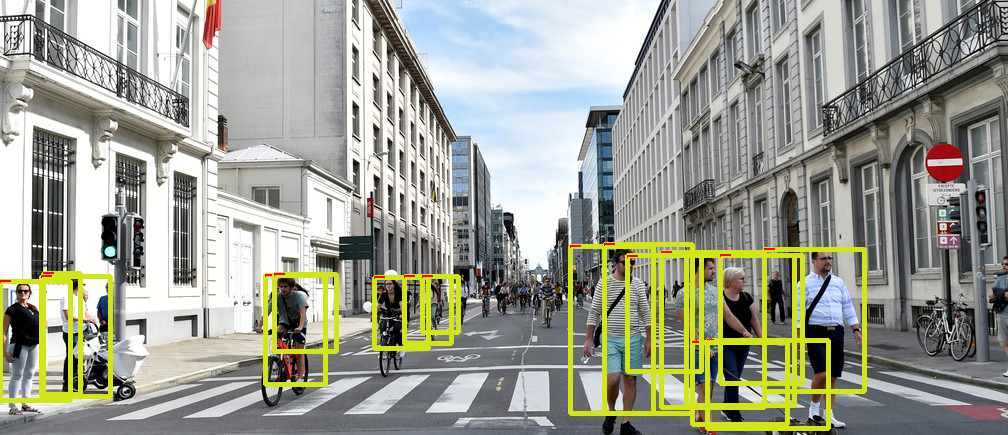

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)
